# Test for running simple matplotlib animations (from ipynb files) 

Most of our students use matplotlib to show images. The way matplotlib works depends a lot by how you run python (from Python shell, from scripts in IDE like Spyder or VSCode, from Jupyter notebook etc.) and the associated [backend](https://matplotlib.org/stable/users/explain/backends.html).

The exercise on deformable models requres that you plot simple animations: sequences of images with assoociated plots. There are many ways of acomplishing this, but for most students the easiest would be to show animation frames in the loop iterations. Therefore we provide the code below, so that you can test (and if needed change) your setup such that it shows animations.

The *desired outcome* of running the code below is to see two images alternating (astronaut and cat) and a circular curve growing for 10 frames. If you either see only the first frame (image 0) or only the last frame (image 9), then the images are not displayed as desired. 

My experience with this so far:

* You can change backend programatically using `matplotlib.use()`, for example `matplotlib.use('Qt5Agg')` before any figure has been created. You should restart the kernel if figures were created in the session. The list of all backends can be seen by running `matplotlib.rcsetup.all_backends`. However, I have not found a way of testing, whether all backends available/installed on specific machine.

* **Spyder** When running python scripts from Spyder, you can set backend in python -> preferences (or wrench icon), then IPython console -> Graphics tab -> Backend. Choose something which is *not* inline, try Qt5. You need to restart the Console for chosen preferences to be effective.

* **VSCode** Running script files from VSCode worked immediately for me, the images open in an new plotting window which is interactive and can show annimations. If this does not work, I would try changing the backend programatically. But if you try running the script cell-by-cell in the interactiwe window, this might not work well with annimations. In that case use the approach as in Interactive notebooks in VSCode.

* **Jupyter Notebooks** When running from the browser (for example by lounching jupyter from anaconda navigator) try chaning backends using IPython magic `%matplotlib notebook`.  This will keep the figure alive instead of displaying a static image. I succedded with this, but the behaviour is sometimes hacky, suddenly stops showing images so I need to restart the kernel.

* **Interactive notebooks in VSCode** I succedded with two approaches. First, using IPython magic `%matplotlib tk` to set the backend to the tk backend. This will open the figure in a new plotting window, which is interactive and can also show animations. Some suggested 
`%matplotlib widget` but it did not work for me. Alternatively, use `display` from `IPython.display` in a loop and clear the output before a new figure is shown. This approach is shown in the *second* cell bellow.

In conclusion: 
* If you use `ipynb` files or run scripts interactivelly, try one of the approaches bellow, possibly you'll need to change the backend with one of the suggested magic.
* Alternatively, try running the code for the first approach as a `py` py.


In [1]:
# Magic command which helps when running ipynb from VSCode
# Use only ONE magic command, so run only one of the two cells

%matplotlib tk

In [2]:
# # Magic command which helps when running ipynb from Jupyter 
# # Use only ONE magic command, so run only one of the two cells
# 
# %matplotlib notebook

In [3]:
# Approach I
# This will work if you manage finding appropriate backend

import numpy as np
import matplotlib.pyplot as plt
import skimage

fig, ax = plt.subplots()

images = [skimage.data.astronaut(), skimage.data.camera(), skimage.data.cat()]

angles = np.linspace(0, (3/2)*np.pi, 36)
x = 20 * np.cos(angles)
y = 20 * np.sin(angles)

for i in range(10):
    ax.clear()  # Prevent matplotlib accumulating all it has drawn.
    im = images[i%len(images)]
    Y, X = im.shape[:2]
    ax.imshow(im)
    ax.plot( X/2 + (i+1) * x, Y/2 + (i+1) * y, '.-c')
    ax.plot( X/2 + (i+1) * x[0], Y/2 + (i+1) * y[0], 'oc', ms=15)
    ax.plot( X/2 + (i+1) * x[-1], Y/2 + (i+1) * y[-1], 'dc', ms=15)
    ax.set_title(f'Image {i}')
    fig.canvas.draw()
    plt.pause(0.1)  # Removing this may result in picture not updating. So rather change to very, very small number

plt.show()


In [7]:
# # Magic command which might help when using approach II
%matplotlib inline

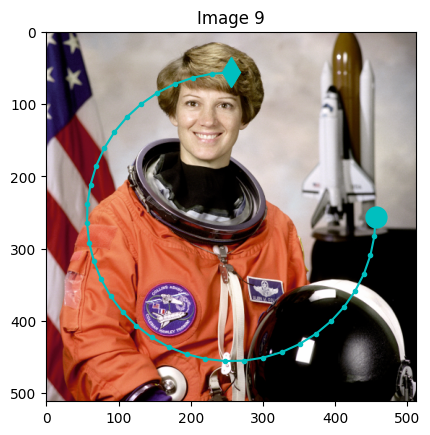

: 

In [ ]:
# Approach II
# Using IPython.display functions in the loop

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import skimage.data

images = [skimage.data.astronaut(), skimage.data.camera(), skimage.data.cat()]

fig, ax = plt.subplots()

angles = np.linspace(0, (3/2)*np.pi, 36)
x = 20 * np.cos(angles)
y = 20 * np.sin(angles)

for i in range(10):
    ax.clear()  # Prevent matplotlib accumulating all it has drawn.
    im = images[i%len(images)]
    Y, X = im.shape[:2]
    ax.imshow(im)
    ax.plot( X/2 + (i+1) * x, Y/2 + (i+1) * y, '.-c')
    ax.plot( X/2 + (i+1) * x[0], Y/2 + (i+1) * y[0], 'oc', ms=15)
    ax.plot( X/2 + (i+1) * x[-1], Y/2 + (i+1) * y[-1], 'dc', ms=15)
    ax.set_title(f'Image {i}')
    display(fig)
    clear_output(wait=True)  # Removes the figure display
plt.close()